In [1]:
from genius_api import client_access_token
import lyricsgenius
import requests
from bs4 import BeautifulSoup as bs

genius = lyricsgenius.Genius(client_access_token)

In [3]:
# Data stored in the 'songs' and 'artists' lists.
songs = []
artists = []

# Scraping song lyrics in three batches: 1959 to 1980, 1981 to 2001, 2002 to 2022
for year in range(1959, 1981): # change the range as necessary    
    r = requests.get(f"https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_{year}")

    # Extract song titles and artists from webpage.
    soup = bs(r.content)
    table = soup.find("tbody")
    rows = table.find_all("tr")

    # Save the previous artist's name in case the same artist has two songs in a row on the charts.
    
    for row in rows[1:]:

        song_artist = row.find_all("a")
        songs.append(song_artist[0].get_text())
        
        if len(song_artist) < 2:
            pass
        else:
            artist = song_artist[1].get_text()
        artists.append(artist)

# Dataframe with song titles and artists.

data = {'songs': songs,
        'artists': artists}
songs_df = pd.DataFrame(data)
songs_df

,songs,artists
0,The Battle of New Orleans,Johnny Horton
1,Mack the Knife,Bobby Darin
2,Personality,Lloyd Price
3,Venus,Frankie Avalon
4,Lonely Boy,Paul Anka
...,...,...
2196,In America,Charlie Daniels Band
2197,Breakdown Dead Ahead,Boz Scaggs
2198,Ships,Barry Manilow
2199,All Night Long,Joe Walsh


In [4]:
# scraping song lyrics
genius.remove_section_headers = True
lyrics = []
for song in songs:
    try:
        lyrics.append(genius.search_song(song, artists[songs.index(song)], get_full_info=False).lyrics.lower())
    except:
        lyrics.append('NaN')

Searching for "The Battle of New Orleans" by Johnny Horton...
Done.
Searching for "Mack the Knife" by Bobby Darin...
Done.
Searching for "Personality" by Lloyd Price...
Done.
Searching for "Venus" by Frankie Avalon...
Done.
Searching for "Lonely Boy" by Paul Anka...
Done.
Searching for "Dream Lover" by Bobby Darin...
Done.
Searching for "The Three Bells" by The Browns...
Done.
Searching for "Come Softly to Me" by The Fleetwoods...
Done.
Searching for "Kansas City" by Wilbert Harrison...
Done.
Searching for "Mr. Blue" by The Fleetwoods...
Done.
Searching for "Sleep Walk" by Santo & Johnny...
Done.
Searching for "Put Your Head on My Shoulder" by Paul Anka...
Done.
Searching for "Stagger Lee" by Lloyd Price...
Done.
Searching for "Donna" by Ritchie Valens...
Done.
Searching for "Pink Shoe Laces" by Dodie Stevens...
Done.
Searching for "Smoke Gets in Your Eyes" by The Platters...
Done.
Searching for "Charlie Brown" by The Coasters...
Done.
Searching for "Quiet Village" by Martin Denny...
D

Done.
Searching for "Burning Bridges" by Jack Scott...
Done.
Searching for "The Big Hurt" by Toni Fisher...
Done.
Searching for "Because They're Young" by Duane Eddy...
Done.
Searching for "Lonely Blue Boy" by Conway Twitty...
Done.
Searching for "Pretty Blue Eyes" by Steve Lawrence...
Done.
Searching for "Way Down Yonder in New Orleans" by Freddy Cannon...
Done.
Searching for "Paper Roses" by Anita Bryant...
Done.
Searching for "Mr. Custer" by Larry Verne...
Done.
Searching for "I Want to Be Wanted" by Brenda Lee...
Done.
Searching for "Mule Skinner Blues" by The Fendermen...
Done.
Searching for "Cradle of Love" by Johnny Preston...
Done.
Searching for "You Got What It Takes" by Marv Johnson...
Done.
Searching for "Please Help Me, I'm Falling" by Hank Locklin...
Done.
Searching for "Love You So" by Ron Holden...
Done.
Searching for "Finger Poppin' Time" by Hank Ballard...
Done.
Searching for "Harbor Lights" by The Platters...
Done.
Searching for "Let the Little Girl Dance" by Billy Bl

Done.
Searching for "Hats Off to Larry" by Del Shannon...
Done.
Searching for "Those Oldies but Goodies" by Little Caesar & the Romans...
Done.
Searching for "The Fly" by Chubby Checker...
Done.
Searching for "(Marie's the Name) His Latest Flame" by Elvis Presley...
Done.
Searching for "Wonderland by Night" by Bert Kaempfert...
Done.
Searching for "Bless You" by Tony Orlando...
Done.
Searching for "I've Told Every Little Star" by Linda Scott...
Done.
Searching for "Bobby Lewis" by Linda Scott...
Done.
Searching for "Angel Baby" by Rosie and the Originals...
Done.
Searching for "Pretty Little Angel Eyes" by Curtis Lee...
Done.
Searching for "Think Twice" by Brook Benton...
Done.
Searching for "Does Your Chewing Gum Lose Its Flavour (On the Bedpost Overnight?)" by Lonnie Donegan...
Done.
Searching for "Breakin' in a Brand New Broken Heart" by Connie Francis...
Done.
Searching for "Mama Said" by The Shirelles...
Done.
Searching for "Fats Domino" by The Shirelles...
Done.
Searching for "Th

Done.
Searching for "If I Had a Hammer" by Peter, Paul and Mary...
Done.
Searching for "I Wish That We Were Married" by Ronnie & the Hi-Lites...
No results found for: 'I Wish That We Were Married Ronnie & the Hi-Lites'
Searching for "Surfin' Safari" by The Beach Boys...
Done.
Searching for "Surfin' U.S.A." by The Beach Boys...
Done.
Searching for "The End of the World" by Skeeter Davis...
Done.
Searching for "Rhythm of the Rain" by The Cascades...
Done.
Searching for "He's So Fine" by The Chiffons...
Done.
Searching for "Blue Velvet" by Bobby Vinton...
Done.
Searching for "Hey Paula" by Paul & Paula...
Done.
Searching for "Fingertips" by Little Stevie Wonder...
Done.
Searching for "Can't Get Used to Losing You" by Andy Williams...
Done.
Searching for "My Boyfriend's Back" by The Angels...
Done.
Searching for "Sukiyaki" by Kyu Sakamoto...
Done.
Searching for "So Much in Love" by The Tymes...
Done.
Searching for "Puff, the Magic Dragon" by Peter, Paul and Mary...
Done.
Searching for "Blo

Done.
Searching for "A World Without Love" by Peter and Gordon...
Done.
Searching for "Have I the Right?" by The Honeycombs...
Done.
Searching for "Don't Let the Rain Come Down (Crooked Little Man)" by The Serendipity Singers...
Done.
Searching for "Baby Love" by The Supremes...
Done.
Searching for "Let It Be Me" by The Everly Brothers...
Done.
Searching for "Wishin' and Hopin'" by Dusty Springfield...
Done.
Searching for "You Don't Own Me" by Lesley Gore...
Done.
Searching for "Walk On By" by Dionne Warwick...
Done.
Searching for "The House of the Rising Sun" by The Animals...
Searching for "G.T.O." by Ronny & the Daytonas...
Done.
Searching for "Twist and Shout" by The Isley Brothers...
Done.
Searching for "Memphis" by Lonnie Mack...
Specified song does not contain lyrics. Rejecting.
Searching for "White on White" by Danny Williams...
Done.
Searching for "Hey Little Cobra" by The Rip Chords...
Done.
Searching for "The Shoop Shoop Song (It's in His Kiss)" by Betty Everett...
Done.
Sea

Done.
Searching for "Save Your Heart for Me" by Gary Lewis & the Playboys...
Done.
Searching for "Tired of Waiting for You" by The Kinks...
Done.
Searching for "Count Me In" by Gary Lewis & the Playboys...
Done.
Searching for "All Day and All of the Night" by The Kinks...
Done.
Searching for "What the World Needs Now Is Love" by Jackie DeShannon...
Done.
Searching for "It's Not Unusual" by Tom Jones...
Done.
Searching for "She's About a Mover" by Sir Douglas Quintet...
Done.
Searching for "Shake" by Sam Cooke...
Done.
Searching for "Wonderful World" by Sam Cooke...
Done.
Searching for "Nowhere to Run" by Martha and the Vandellas...
Done.
Searching for "Heart Full of Soul" by The Yardbirds...
Done.
Searching for "Love Potion No. 9" by The Searchers...
Done.
Searching for "Dickey Lee" by The Searchers...
Done.
Searching for "Baby Don't Go" by Sonny & Cher...
Done.
Searching for "It Ain't Me Babe" by The Turtles...
Done.
Searching for "Tell Her No" by The Zombies...
Done.
Searching for "I

Done.
Searching for "Yellow Submarine" by The Beatles...
Done.
Searching for "Hungry" by Paul Revere & the Raiders...
Done.
Searching for "Zorba the Greek" by Herb Alpert and the Tijuana Brass...
Specified song does not contain lyrics. Rejecting.
Searching for "Shapes of Things" by The Yardbirds...
Done.
Searching for "Along Comes Mary" by The Association...
Done.
Searching for "634-5789 (Soulsville, U.S.A.)" by Wilson Pickett...
No results found for: '634-5789 (Soulsville, U.S.A.) Wilson Pickett'
Searching for "Devil with a Blue Dress On" by Good Golly, Miss Molly...
Done.
Searching for "Wouldn't It Be Nice" by The Beach Boys...
Done.
Searching for "This Old Heart of Mine" by The Isley Brothers...
Done.
Searching for "Green Grass" by Gary Lewis & the Playboys...
Done.
Searching for "A Well Respected Man" by The Kinks...
Done.
Searching for "To Sir With Love" by Lulu...
Done.
Searching for "The Letter" by The Box Tops...
Done.
Searching for "Ode to Billie Joe" by Bobbie Gentry...
Done.

Specified song does not contain lyrics. Rejecting.
Searching for "Midnight Confessions" by The Grass Roots...
Done.
Searching for "Dance to the Music" by Sly and the Family Stone...
Done.
Searching for "The Horse" by Cliff Nobles...
Specified song does not contain lyrics. Rejecting.
Searching for "I Wish It Would Rain" by The Temptations...
Done.
Searching for "La-La (Means I Love You)" by The Delfonics...
Done.
Searching for "Turn Around, Look at Me" by The Vogues...
Done.
Searching for "Judy in Disguise (With Glasses)" by John Fred & His Playboy Band...
Done.
Searching for "Spooky" by Classics IV...
Done.
Searching for "Love Child" by The Supremes...
Done.
Searching for "Angel of the Morning" by Merrilee Rush...
Done.
Searching for "The Ballad of Bonnie and Clyde" by Georgie Fame...
Done.
Searching for "Those Were the Days" by Mary Hopkin...
Done.
Searching for "Born to Be Wild" by Steppenwolf...
Searching for "Cowboys to Girls" by The Intruders...
Done.
Searching for "Simon Says" by

Done.
Searching for "I'd Wait a Million Years" by The Grass Roots...
Done.
Searching for "Touch Me" by The Doors...
Done.
Searching for "More Today Than Yesterday" by Spiral Starecase...
Done.
Searching for "I've Gotta Be Me" by Sammy Davis Jr....
Done.
Searching for "Lay Lady Lay" by Bob Dylan...
Done.
Searching for "Atlantis" by Donovan...
Done.
Searching for "Traces" by Classics IV...
Done.
Searching for "It's Getting Better" by "Mama" Cass Elliot...
Done.
Searching for "This Magic Moment" by Jay and the Americans...
Done.
Searching for "Runaway Child, Running Wild" by The Temptations...
Done.
Searching for "Hawaii Five-O" by The Ventures...
Specified song does not contain lyrics. Rejecting.
Searching for "Galveston" by Glen Campbell...
Done.
Searching for "I'm Gonna Make You Mine" by Lou Christie...
Done.
Searching for "Gitarzan" by Ray Stevens...
Done.
Searching for "Can I Change My Mind" by Tyrone Davis...
Done.
Searching for "Time Is Tight" by Booker T. & the M.G.'s...
Specified

Done.
Searching for "For the Love of Him" by Bobbi Martin...
Done.
Searching for "Mississippi Queen" by Mountain...
Done.
Searching for "I Want to Take You Higher" by Ike & Tina Turner...
Done.
Searching for "The Letter" by The Box Tops...
Done.
Searching for "Ma Belle Amie" by Tee-Set...
Done.
Searching for "The Bells" by The Originals...
Done.
Searching for "Yellow River" by Christie...
Done.
Searching for "Somebody's Been Sleeping" by 100 Proof (Aged in Soul)...
Done.
Searching for "Vehicle" by The Ides of March...
Done.
Searching for "Gimme Dat Ding" by The Pipkins...
Done.
Searching for "Lay a Little Lovin' on Me" by Robin McNamara...
Done.
Searching for "Up the Ladder to the Roof" by The Supremes...
Done.
Searching for "Travelin' Band" by Creedence Clearwater Revival...
Done.
Searching for "Come Saturday Morning" by The Sandpipers...
Done.
Searching for "Psychedelic Shack" by The Temptations...
Done.
Searching for "Without Love (There Is Nothing)" by Tom Jones...
Done.
Searching 

Done.
Searching for "Baby, Don't Get Hooked on Me" by Mac Davis...
Done.
Searching for "Brand New Key" by Melanie...
Done.
Searching for "Daddy Don't You Walk So Fast" by Wayne Newton...
Done.
Searching for "Let's Stay Together" by Al Green...
Searching for "Brandy (You're a Fine Girl)" by Looking Glass...
Done.
Searching for "Oh Girl" by The Chi-Lites...
Done.
Searching for "Nice to Be with You" by Gallery...
Done.
Searching for "My Ding-a-Ling" by Chuck Berry...
Done.
Searching for "(If Loving You Is Wrong) I Don't Want to Be Right" by Luther Ingram...
Done.
Searching for "Heart of Gold" by Neil Young...
Done.
Searching for "Betcha by Golly, Wow" by The Stylistics...
Done.
Searching for "I'll Take You There" by The Staple Singers...
Done.
Searching for "Ben" by Michael Jackson...
Done.
Searching for "The Lion Sleeps Tonight" by Robert John...
Done.
Searching for "Outa-Space" by Billy Preston...
Specified song does not contain lyrics. Rejecting.
Searching for "Slippin' into Darkness" 

Done.
Searching for "Monster Mash" by Bobby 'Boris' Pickett...
Done.
Searching for "Natural High" by Bloodstone...
Done.
Searching for "Diamond Girl" by Seals and Crofts...
Done.
Searching for "Long Train Runnin'" by The Doobie Brothers...
Done.
Searching for "Give Me Love (Give Me Peace on Earth)" by George Harrison...
Done.
Searching for "If You Want Me to Stay" by Sly & the Family Stone...
Done.
Searching for "Daddy's Home" by Shep and the Limelites...
Done.
Searching for "Neither One of Us (Wants to Be the First to Say Goodbye)" by Gladys Knight & the Pips...
Done.
Searching for "I'm Doin' Fine Now" by New York City...
Done.
Searching for "Could It Be I'm Falling in Love" by The Spinners...
Done.
Searching for "Daniel" by Elton John...
Done.
Searching for "Midnight Train to Georgia" by Gladys Knight & the Pips...
Done.
Searching for "Smoke on the Water" by Deep Purple...
Done.
Searching for "The Cover of the Rolling Stone" by Dr. Hook & The Medicine Show...
Done.
Searching for "Beh

Done.
Searching for "Put Your Hands Together" by The O'Jays...
Done.
Searching for "On and On" by Gladys Knight & the Pips...
Done.
Searching for "Oh Very Young" by Cat Stevens...
Done.
Searching for "Leave Me Alone (Ruby Red Dress)" by Helen Reddy...
Done.
Searching for "Goodbye Yellow Brick Road" by Elton John...
Done.
Searching for "(I've Been) Searchin' So Long" by Chicago...
Done.
Searching for "Oh My My" by Ringo Starr...
Done.
Searching for "For the Love of Money" by The O'Jays...
Done.
Searching for "I Shot the Sheriff" by Eric Clapton...
Done.
Searching for "Jet" by Paul McCartney and Wings...
Done.
Searching for "Don't Let the Sun Go Down on Me" by Elton John...
Done.
Searching for "Tubular Bells" by Mike Oldfield...
Done.
Searching for "A Love Song" by Anne Murray...
Done.
Searching for "I'm Leaving It (All) Up to You" by Donny...
Done.
Searching for "Hello It's Me" by Todd Rundgren...
Done.
Searching for "I Love" by Tom T. Hall...
Done.
Searching for "Clap for the Wolfman" 

Done.
Searching for "December, 1963 (Oh, What a Night)" by The Four Seasons...
Searching for "Play That Funky Music" by Wild Cherry...
Searching for "Kiss and Say Goodbye" by The Manhattans...
Done.
Searching for "Love Machine" by The Miracles...
Done.
Searching for "50 Ways to Leave Your Lover" by Paul Simon...
Done.
Searching for "Love Is Alive" by Gary Wright...
Done.
Searching for "A Fifth of Beethoven" by Walter Murphy...
Specified song does not contain lyrics. Rejecting.
Searching for "Sara Smile" by Hall & Oates...
Done.
Searching for "Afternoon Delight" by Starland Vocal Band...
Done.
Searching for "I Write the Songs" by Barry Manilow...
Done.
Searching for "Fly, Robin, Fly" by Silver Convention...
Done.
Searching for "Love Hangover" by Diana Ross...
Done.
Searching for "Get Closer" by Seals and Crofts...
Done.
Searching for "More, More, More" by Andrea True Connection...
Done.
Searching for "Bohemian Rhapsody" by Queen...
Searching for "Misty Blue" by Dorothy Moore...
Done.
Se

Done.
Searching for "So in to You" by Atlanta Rhythm Section...
Done.
Searching for "Dreams" by Fleetwood Mac...
Searching for "Enjoy Yourself" by The Jacksons...
Done.
Searching for "Dazz" by Brick...
Done.
Searching for "I'm in You" by Peter Frampton...
Done.
Searching for "Lucille" by Kenny Rogers...
Done.
Searching for "The Things We Do for Love" by 10cc...
Done.
Searching for "Da Doo Ron Ron" by The Crystals...
Done.
Searching for "Handy Man" by Jimmy Jones...
Done.
Searching for "Just a Song Before I Go" by Crosby, Stills & Nash...
Done.
Searching for "You and Me" by Alice Cooper...
Done.
Searching for "Swayin' to the Music (Slow Dancing)" by Johnny Rivers...
Done.
Searching for "Lonely Boy" by Paul Anka...
Done.
Searching for "I Wish" by Stevie Wonder...
Done.
Searching for "Don't Stop" by Fleetwood Mac...
Done.
Searching for "Barracuda" by Heart...
Searching for "Strawberry Letter 23" by The Brothers Johnson...
Done.
Searching for "Night Moves" by Bob Seger & The Silver Bullet 

Done.
Searching for "Serpentine Fire" by Earth, Wind & Fire...
Done.
Searching for "Sentimental Lady" by Bob Welch...
Done.
Searching for "Falling" by LeBlanc...
Done.
Searching for "Don't Let Me Be Misunderstood" by Santa Esmeralda...
Done.
Searching for "Bluer Than Blue" by Michael Johnson...
Done.
Searching for "Running on Empty" by Jackson Browne...
Done.
Searching for "Whenever I Call You 'Friend'" by Kenny Loggins...
Done.
Searching for "Fool (If You Think It's Over)" by Chris Rea...
Done.
Searching for "Get Off" by Foxy...
Done.
Searching for "Sweet Talkin' Woman" by Electric Light Orchestra...
Done.
Searching for "Life's Been Good" by Joe Walsh...
Done.
Searching for "I Love the Nightlife" by Alicia Bridges...
Done.
Searching for "You Can't Turn Me Off (In The Middle Of Turning Me On)" by High Inergy...
Done.
Searching for "It's So Easy" by Linda Ronstadt...
Done.
Searching for "Native New Yorker" by Odyssey...
Done.
Searching for "Flash Light" by Parliament...
Done.
Searching 

Done.
Searching for "Lost in Love" by Air Supply...
Done.
Searching for "Little Jeannie" by Elton John...
Done.
Searching for "Ride Like the Wind" by Christopher Cross...
Done.
Searching for "Upside Down" by Diana Ross...
Done.
Searching for "Please Don't Go" by KC and the Sunshine Band...
Done.
Searching for "Babe" by Styx...
Done.
Searching for "With You I'm Born Again" by Billy Preston...
Done.
Searching for "Shining Star" by Earth, Wind & Fire...
Done.
Searching for "Still" by Bill Anderson...
Done.
Searching for "Yes, I'm Ready" by Barbara Mason...
Done.
Searching for "Sexy Eyes" by Dr. Hook...
Done.
Searching for "Steal Away" by Jimmy Hughes...
Done.
Searching for "Biggest Part of Me" by Ambrosia...
Done.
Searching for "This Is It" by Kenny Loggins...
Done.
Searching for "Cupid" by The Spinners...
Done.
Searching for "Let's Get Serious" by Jermaine Jackson...
Done.
Searching for "Don't Fall in Love with a Dreamer" by Kenny Rogers...
Done.
Searching for "Sailing" by Christopher Cr

In [106]:
# cleanup part 1

df2 = songs_df
df2['lyrics'] = lyrics
df2 = df2[df2['lyrics']!= 'NaN']

#some songs had other stuff (random book chapters!) instead of lyrics: dropped these based on their string lengths    
df2['length'] = df2['lyrics'].str.len()
df2 = df2[df2['length']< 10000]    # all lyrics with over 10000 characters are genius errors 
df2

,songs,artists,lyrics,length
0,The Battle of New Orleans,Johnny Horton,in 1814 we took a little trip\nalong with colo...,2500
1,Mack the Knife,Bobby Darin,"oh the shark, babe, has such teeth, dear\nand ...",1189
2,Personality,Lloyd Price,over and over\ni tried to prove my love to you...,1435
3,Venus,Frankie Avalon,"hey, venus!\noh, venus!\n\nvenus, if you will\...",776
4,Lonely Boy,Paul Anka,i'm just a lonely boy\nlonely and blue\ni'm al...,717
...,...,...,...,...
2196,In America,Charlie Daniels Band,well the eagle's been flying slow\nand the fla...,1171
2197,Breakdown Dead Ahead,Boz Scaggs,i call ya\nyou ain't in\nwhat's this cold reac...,1144
2198,Ships,Barry Manilow,we walked to the sea\njust my father and me\na...,1012
2199,All Night Long,Joe Walsh,we get up early and we work all day\nwe put ou...,545


In [1]:
# cleanup part 2
# !pip install textblob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from textblob import Word
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop = stopwords.words('english')

# removing stop words and applying lemmatization
df2['lyrics'] = df2['lyrics'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['lyrics'] = df2['lyrics'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df2['lyrics'] = df2['lyrics'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# saving the dataframe
df2.to_csv('lyrics_1959_to_1980.csv', index=False)

In [3]:
import pandas as pd

df2 = pd.read_csv('lyrics_1959_to_1980.csv')
df2

,songs,artists,lyrics,length
0,The Battle of New Orleans,Johnny Horton,1814 took little trip along colonel jackson mi...,2500
1,Mack the Knife,Bobby Darin,"oh shark, babe, teeth, dear show pearly white ...",1189
2,Personality,Lloyd Price,tried prove love do? friend say i'm fool i'll ...,1435
3,Venus,Frankie Avalon,"hey, venus! oh, venus! venus, please, send lit...",776
4,Lonely Boy,Paul Anka,i'm lonely boy lonely blue i'm alone nothin' i...,717
...,...,...,...,...
1985,In America,Charlie Daniels Band,well eagle's flying slow flag's flying low lot...,1171
1986,Breakdown Dead Ahead,Boz Scaggs,call ya ain't what's cold reaction been? ooh b...,1144
1987,Ships,Barry Manilow,walked sea father dog played around sand winte...,1012
1988,All Night Long,Joe Walsh,get early work day put time cause like stay ni...,545


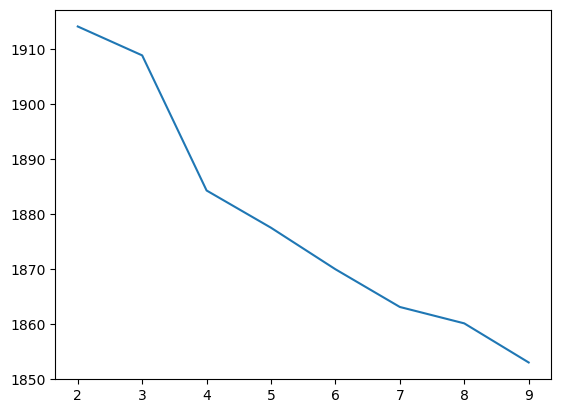

In [4]:
# vectorize the lyrics and check how many clusters the data could be split into (the elbow test).

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
from sklearn import cluster
tf = TfidfVectorizer()

X = df2['lyrics']
X = tf.fit_transform(X)

inertia = []
labels = {}
# Looking at 2-10 clusters.
for i in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=i, n_init='auto', random_state=101)
    kmeans.fit(X)
    labels[f'{i}_clusters'] = kmeans.labels_
    inertia.append(kmeans.inertia_)

plt.plot(range(2,10), inertia)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.0022942785887708397


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.007767500847623497


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.0067604945297970506


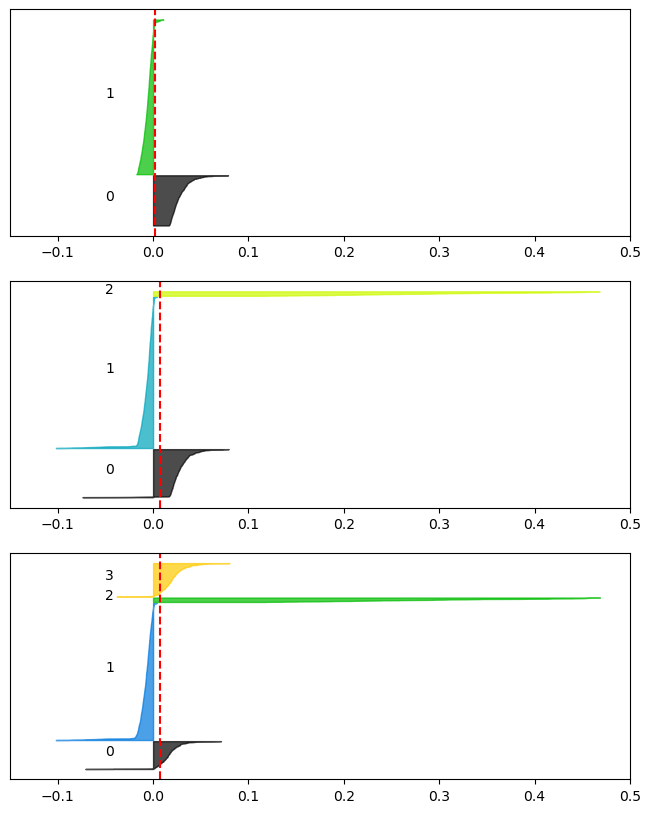

In [5]:
# 2, 3 or 4 clusters could work; checking silhouette scores for each

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

fig, axs = plt.subplots(3, 1, figsize=(8,10))

range_n_clusters = [2, 3, 4]

for n in range(len(range_n_clusters)):
    axs[n].set_xlim([-0.15, 0.5])   

    clusterer = cluster.KMeans(n_clusters=range_n_clusters[n], random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", range_n_clusters[n],
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(range_n_clusters[n]):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / range_n_clusters[n])
        axs[n].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axs[n].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # The vertical line for average silhouette score of all the values
    axs[n].axvline(x=silhouette_avg, color="red", linestyle="--")

    axs[n].set_yticks([])  # Clear the yaxis labels / ticks

In [112]:
# check how the songs would be split into 4 clusters
kmeans = cluster.KMeans(n_clusters=4, random_state=101)  
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
df2['label'] = y_kmeans
df2['label'].value_counts()

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    1311
2     384
1     251
3      44
Name: label, dtype: int64

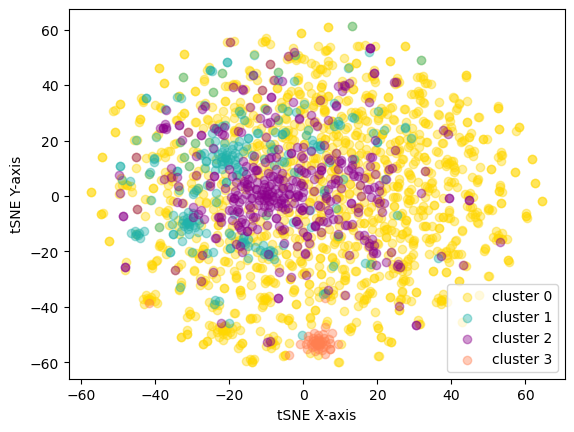

In [113]:
# visualize clusters in 2D using TSNE

from sklearn import manifold

vec_df = pd.DataFrame(X.toarray())    # df with vectors generated by tfid
model = manifold.TSNE(n_components=2, perplexity=30)    # can try perplexity values between 5 and 50
out = model.fit_transform(vec_df)

df_tsne = pd.DataFrame(out)
df_tsne['label'] = y_kmeans

cluster3_tsne = df_tsne[df_tsne['label']==3]
cluster2_tsne = df_tsne[df_tsne['label']==2]
cluster1_tsne = df_tsne[df_tsne['label']==1]
cluster0_tsne = df_tsne[df_tsne['label']==0]

plt.scatter(cluster0_tsne[0], cluster0_tsne[1], c = 'gold', alpha = 0.4, label = 'cluster 0')
plt.scatter(cluster1_tsne[0], cluster1_tsne[1], c = 'lightseagreen', alpha = 0.4, label = 'cluster 1')
plt.scatter(cluster2_tsne[0], cluster2_tsne[1], c = 'darkmagenta', alpha = 0.4, label = 'cluster 2')
plt.scatter(cluster3_tsne[0], cluster3_tsne[1], c = 'coral', alpha = 0.4, label = 'cluster 3')
plt.xlabel('tSNE X-axis')
plt.ylabel('tSNE Y-axis')
plt.legend()
plt.show()

In [8]:
# now trying to analyze how the lyrics were clustered
# first, some basic cluster analysis by word frequency and unique words in each cluster
from collections import Counter

# a function to remove punctuation and non-alphanumerics (for word-counting purposes)
def remove_punct(word):
    for char in word:
        if not char.isalnum():
            word = word.replace(char, "")
    return word

cluster3 = df2[df2['label']==3]
cluster2 = df2[df2['label']==2]
cluster1 = df2[df2['label']==1]
cluster0 = df2[df2['label']==0]
clusters = [cluster0, cluster1, cluster2, cluster3]

# checking 20 most common words in each cluster
d = {'cluster0': [], 'cluster1' : [], 'cluster2' : [], 'cluster3' : []}
n = 0
for cl in clusters:
    lst = []
    for l in cl.lyrics:
        lst.extend(l.split())
        lst_clean = map(remove_punct, lst)
    c = Counter(lst_clean)
    d[f'cluster{n}'] = [x[0] for x in list(c.most_common(20))]
    print(f"\nThe most common words in cluster {n} are: {c.most_common(20)}")
    print(f'The word {c.most_common(1)[0][0]} appears {(c.most_common(1)[0][1]/len(cl)):.2f} times per song on average.')
    print(f'The word {c.most_common(2)[1][0]} appears {(c.most_common(2)[1][1]/len(cl)):.2f} times per song on average.')
    n+=1

# checking words among the 20 most common ones that are unique to each cluster
lst123 = d['cluster1'] + d['cluster2'] + d['cluster3']
unique0 = [x for x in d['cluster0'] if x not in lst123]

lst023 = d['cluster0'] + d['cluster2'] + d['cluster3']
unique1 = [x for x in d['cluster1'] if x not in lst023]

lst013 = d['cluster0'] + d['cluster1'] + d['cluster3']
unique2 = [x for x in d['cluster2'] if x not in lst013]

lst012 = d['cluster0'] + d['cluster1'] + d['cluster2']
unique3 = [x for x in d['cluster3'] if x not in lst012]

print(f"""\nUnique words among the 20 most common ones are:
Cluster 0: {unique0}\nCluster 1: {unique1}\nCluster 2: {unique2}\nCluster3:{unique3}.""")


The most common words in cluster 0 are: [('im', 1996), ('oh', 1851), ('love', 1755), ('know', 1723), ('get', 1721), ('got', 1579), ('yeah', 1525), ('like', 1478), ('come', 1469), ('go', 1329), ('time', 1166), ('see', 1027), ('say', 1004), ('gonna', 1001), ('take', 991), ('night', 982), ('baby', 926), ('one', 913), ('well', 911), ('day', 903)]
The word im appears 1.52 times per song on average.
The word oh appears 1.41 times per song on average.

The most common words in cluster 1 are: [('baby', 2201), ('oh', 896), ('yeah', 889), ('love', 824), ('ooh', 662), ('come', 598), ('im', 481), ('you', 479), ('know', 433), ('got', 420), ('get', 418), ('take', 354), ('let', 337), ('me', 321), ('time', 304), ('want', 281), ('good', 280), ('like', 279), ('hey', 267), ('say', 246)]
The word baby appears 8.77 times per song on average.
The word oh appears 3.57 times per song on average.

The most common words in cluster 2 are: [('love', 4102), ('im', 725), ('oh', 702), ('know', 671), ('you', 534), (

C:\Users\User\AppData\Local\Temp\ipykernel_21452\3006934429.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['sentiment'] = cl['lyrics'].apply(lambda x: TextBlob(x).sentiment[0])
C:\Users\User\AppData\Local\Temp\ipykernel_21452\3006934429.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['sentimentVaderPos'] = cl['lyrics'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
C:\Users\User\AppData\Local\Temp\ipykernel_21452\3006934429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a

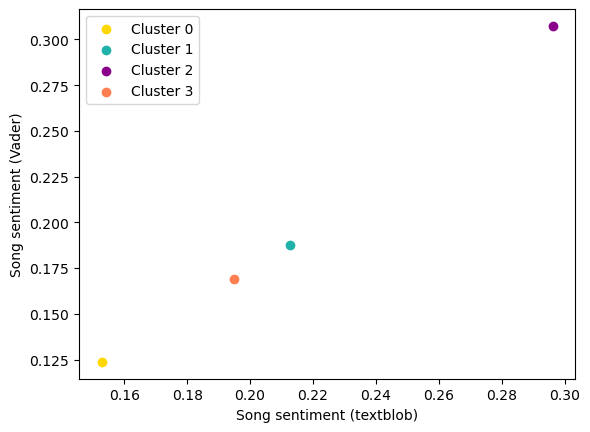

In [9]:
# next looking at sentiment analysis
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

for cl in clusters:
    cl['sentiment'] = cl['lyrics'].apply(lambda x: TextBlob(x).sentiment[0])
    cl['sentimentVaderPos'] = cl['lyrics'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
    cl['sentimentVaderNeg'] = cl['lyrics'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
    cl['Vader'] = cl['sentimentVaderPos'] - cl['sentimentVaderNeg']

plt.scatter(cluster0['sentiment'].mean(), cluster0['Vader'].mean(), c = 'gold', label='Cluster 0')
plt.scatter(cluster1['sentiment'].mean(), cluster1['Vader'].mean(), c = 'lightseagreen', label='Cluster 1')
plt.scatter(cluster2['sentiment'].mean(), cluster2['Vader'].mean(), c = 'darkmagenta', label='Cluster 2')
plt.scatter(cluster3['sentiment'].mean(), cluster3['Vader'].mean(), c = 'coral', label='Cluster 3')

plt.xlabel('Song sentiment (textblob)')
plt.ylabel('Song sentiment (Vader)')
plt.legend()
plt.show()

In [10]:
for cl in clusters:
    print((cl['sentiment'].mean() + cl['Vader'].mean())/2)

0.13825070767802977
0.2002290583844425
0.3017641400967521
0.18201449751166504


In [12]:
# looking at 1981-2001 songs (scraped and cleaned up as shown above)
df3 = pd.read_csv('lyrics_1981_to_2001.csv')
df3

,songs,artists,lyrics,length
0,Bette Davis Eyes,Kim Carnes,hair harlow gold lip sweet surprise hand never...,1202
1,Endless Love,Diana Ross,"love, there's life thing that’s right first lo...",904
2,Lady,Kenny Rogers,lady i'm knight shining armor love made love t...,824
3,(Just Like) Starting Over,John Lennon,life together precious together grown - grown ...,1243
4,Jessie's Girl,Rick Springfield,"jessie friend yeah, know, he's good friend min...",1424
...,...,...,...,...
1900,Be Like That,3 Doors Down,spends night california watching star big scre...,1448
1901,Most Girls,Pink,"never cared much love bunch mush want paid, is...",2507
1902,Oochie Wally,QB Finest,"1st chorus] oo-chie wally wally, oo-chie bang ...",3059
1903,Hero,Enrique Iglesias,there's hero look inside heart afraid there’s ...,1260


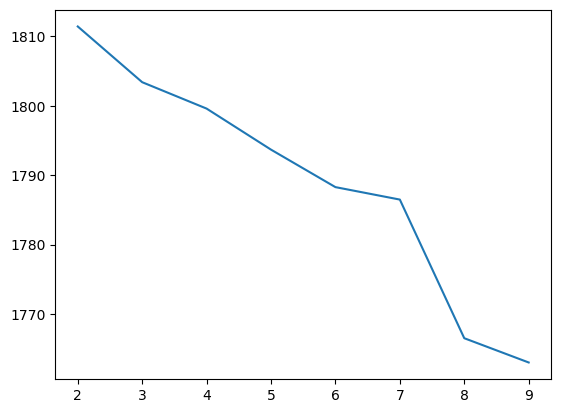

In [13]:
# vectorize the lyrics and check how many clusters we could try splitting the data into (the elbow test)
tf = TfidfVectorizer()

X3 = df3['lyrics']
X3 = tf.fit_transform(X3)

inertia = []
labels = {}
# Looking at 2-10 clusters.
for i in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=i, n_init='auto', random_state=50)
    kmeans.fit(X3)
    labels[f'{i}_clusters'] = kmeans.labels_
    inertia.append(kmeans.inertia_)

plt.plot(range(2,10), inertia)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.002318601099699814


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.0016060988629652824


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.005410058603100847


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.007278310445663442


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.009795666556368508


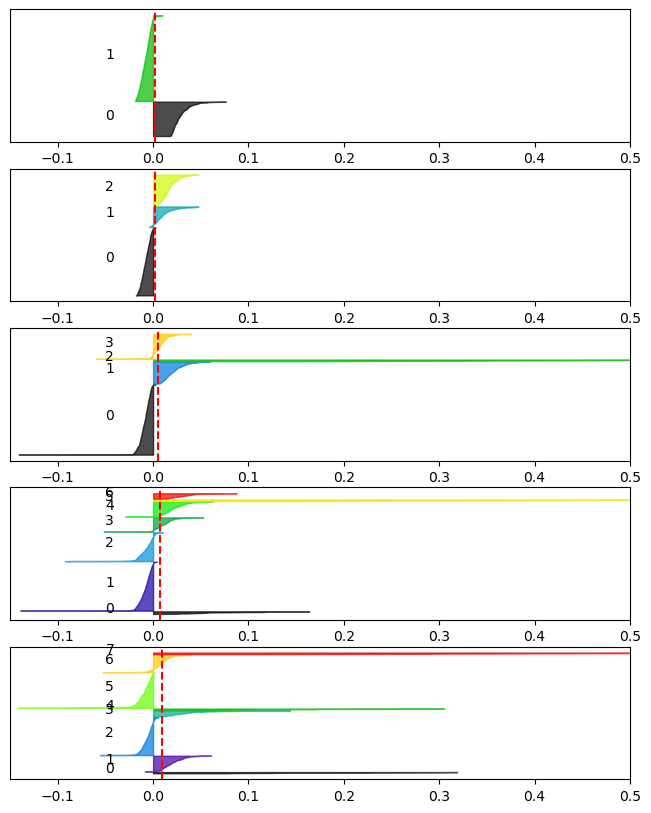

In [104]:
# 2, 3 or 4 clusters could work; checking silhouette scores for each

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

fig, axs = plt.subplots(5, 1, figsize=(8,10))

range_n_clusters = [2, 3, 4, 7, 8]

for n in range(len(range_n_clusters)):
    axs[n].set_xlim([-0.15, 0.5])    # First tried [-1, 1] but found that all the values lie within [-0.15,0.5]

    clusterer = cluster.KMeans(n_clusters=range_n_clusters[n], random_state=10)
    cluster_labels = clusterer.fit_predict(X3)
    silhouette_avg = silhouette_score(X3, cluster_labels)
    print("For n_clusters =", range_n_clusters[n],
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X3, cluster_labels)

    y_lower = 10
    for i in range(range_n_clusters[n]):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / range_n_clusters[n])
        axs[n].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axs[n].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # The vertical line for average silhouette score of all the values
    axs[n].axvline(x=silhouette_avg, color="red", linestyle="--")

    axs[n].set_yticks([])  # Clear the yaxis labels / ticks

In [105]:
# check how the songs would be split into 8 clusters
kmeans = cluster.KMeans(n_clusters=8, random_state=50)  
kmeans.fit(X3)
y_kmeans3 = kmeans.predict(X3)
df3['label'] = y_kmeans3
df3['label'].value_counts()

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7    701
1    557
0    218
3    213
5     84
2     67
6     38
4     27
Name: label, dtype: int64

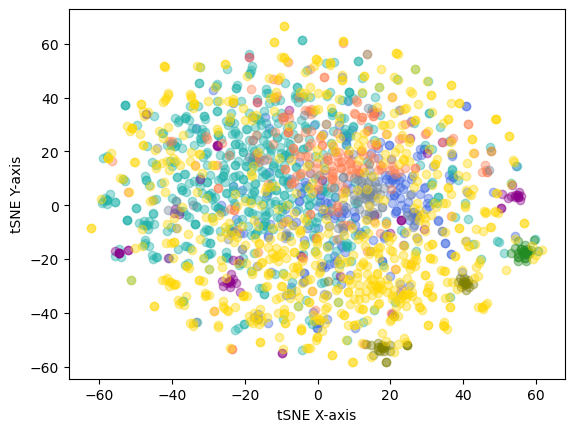

In [110]:
# visualize clusters in 2D using TSNE

from sklearn import manifold

vec_df3 = pd.DataFrame(X3.toarray())    # df with vectors generated by tfid
model = manifold.TSNE(n_components=2, perplexity=30)    # can try perplexity values between 5 and 50
out = model.fit_transform(vec_df)

df_tsne = pd.DataFrame(out)
df_tsne['label'] = y_kmeans3

cluster7_tsne = df_tsne[df_tsne['label']==7]
cluster6_tsne = df_tsne[df_tsne['label']==6]
cluster5_tsne = df_tsne[df_tsne['label']==5]
cluster4_tsne = df_tsne[df_tsne['label']==4]
cluster3_tsne = df_tsne[df_tsne['label']==3]
cluster2_tsne = df_tsne[df_tsne['label']==2]
cluster1_tsne = df_tsne[df_tsne['label']==1]
cluster0_tsne = df_tsne[df_tsne['label']==0]

plt.scatter(cluster0_tsne[0], cluster0_tsne[1], c = 'royalblue', alpha = 0.4, label = 'cluster 0')
plt.scatter(cluster1_tsne[0], cluster1_tsne[1], c = 'lightseagreen', alpha = 0.4, label = 'cluster 1')
plt.scatter(cluster2_tsne[0], cluster2_tsne[1], c = 'darkmagenta', alpha = 0.4, label = 'cluster 2')
plt.scatter(cluster3_tsne[0], cluster3_tsne[1], c = 'coral', alpha = 0.4, label = 'cluster 3')
plt.scatter(cluster4_tsne[0], cluster4_tsne[1], c = 'forestgreen', alpha = 0.4, label = 'cluster 4')
plt.scatter(cluster5_tsne[0], cluster5_tsne[1], c = 'lightslategrey', alpha = 0.4, label = 'cluster 5')
plt.scatter(cluster6_tsne[0], cluster6_tsne[1], c = 'olive', alpha = 0.4, label = 'cluster 6')
plt.scatter(cluster7_tsne[0], cluster7_tsne[1], c = 'gold', alpha = 0.4, label = 'cluster 7')

plt.xlabel('tSNE X-axis')
plt.ylabel('tSNE Y-axis')
# plt.legend()
plt.show()

In [127]:
# now trying to analyze how the lyrics were clustered
# first, some basic cluster analysis by word frequency and unique words in each cluster
from collections import Counter

# a function to remove punctuation and non-alphanumerics (for word-counting purposes)
def remove_punct(word):
    for char in word:
        if not char.isalnum():
            word = word.replace(char, "")
    return word

cluster7_ = df3[df3['label']==7]
cluster6_ = df3[df3['label']==6]
cluster5_ = df3[df3['label']==5]
cluster4_ = df3[df3['label']==4]
cluster3_ = df3[df3['label']==3]
cluster2_ = df3[df3['label']==2]
cluster1_ = df3[df3['label']==1]
cluster0_ = df3[df3['label']==0]
clusters_ = [cluster0_, cluster1_, cluster2_, cluster3_, cluster4_, cluster5_, cluster6_, cluster7_]

# checking 20 most common words in each cluster
d_ = {'cluster0': [], 'cluster1' : [], 'cluster2' : [], 'cluster3' : [], 'cluster4': [], 'cluster5' : [], 'cluster6' : [], 'cluster7' : []}
n = 0
for cl in clusters_:
    lst = []
    for l in cl.lyrics:
        lst.extend(l.split())
        lst_clean = map(remove_punct, lst)
    c = Counter(lst_clean)
    d_[f'cluster{n}'] = [x[0] for x in list(c.most_common(20))]
    print(f"\nThe most common words in cluster {n} are: {c.most_common(20)}")
    print(f'The word {c.most_common(1)[0][0]} appears {(c.most_common(1)[0][1]/len(cl)):.2f} times per song on average.')
    print(f'The word {c.most_common(2)[1][0]} appears {(c.most_common(2)[1][1]/len(cl)):.2f} times per song on average.')
    n+=1


The most common words in cluster 0 are: [('baby', 1873), ('yeah', 1557), ('want', 1131), ('wanna', 1067), ('know', 904), ('love', 857), ('im', 819), ('me', 752), ('get', 739), ('oh', 627), ('got', 622), ('you', 620), ('make', 609), ('come', 592), ('it', 566), ('gonna', 512), ('need', 487), ('girl', 470), ('one', 429), ('like', 425)]
The word baby appears 8.59 times per song on average.
The word yeah appears 7.14 times per song on average.

The most common words in cluster 1 are: [('know', 1581), ('im', 1392), ('love', 1370), ('never', 1111), ('time', 1078), ('ill', 898), ('say', 878), ('heart', 827), ('one', 822), ('go', 810), ('see', 791), ('way', 774), ('make', 762), ('you', 740), ('cant', 731), ('oh', 689), ('like', 687), ('take', 676), ('gonna', 663), ('get', 631)]
The word know appears 2.84 times per song on average.
The word im appears 2.50 times per song on average.

The most common words in cluster 2 are: [('ooh', 549), ('love', 257), ('baby', 229), ('yeah', 226), ('know', 209

C:\Users\User\AppData\Local\Temp\ipykernel_21452\3444840481.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['sentiment'] = cl['lyrics'].apply(lambda x: TextBlob(x).sentiment[0])
C:\Users\User\AppData\Local\Temp\ipykernel_21452\3444840481.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['sentimentVaderPos'] = cl['lyrics'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
C:\Users\User\AppData\Local\Temp\ipykernel_21452\3444840481.py:10: SettingWithCopyWarning: 
A value is trying to be set on a

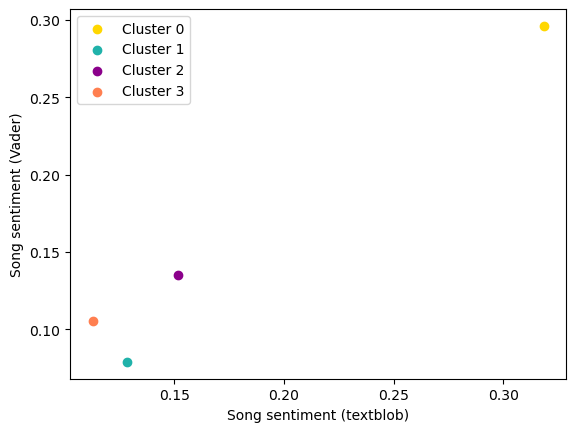

0.30730078516712356
0.1038097331931035
0.14343359099070596
0.10931264014724373


In [18]:
# next doing sentiment analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

for cl in clusters_:
    cl['sentiment'] = cl['lyrics'].apply(lambda x: TextBlob(x).sentiment[0])
    cl['sentimentVaderPos'] = cl['lyrics'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
    cl['sentimentVaderNeg'] = cl['lyrics'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
    cl['Vader'] = cl['sentimentVaderPos'] - cl['sentimentVaderNeg']

plt.scatter(cluster0_['sentiment'].mean(), cluster0_['Vader'].mean(), c = 'gold', label='Cluster 0')
plt.scatter(cluster1_['sentiment'].mean(), cluster1_['Vader'].mean(), c = 'lightseagreen', label='Cluster 1')
plt.scatter(cluster2_['sentiment'].mean(), cluster2_['Vader'].mean(), c = 'darkmagenta', label='Cluster 2')
plt.scatter(cluster3_['sentiment'].mean(), cluster3_['Vader'].mean(), c = 'coral', label='Cluster 3')

plt.xlabel('Song sentiment (textblob)')
plt.ylabel('Song sentiment (Vader)')
plt.legend()
plt.show()

for cl in clusters_:
    print((cl['sentiment'].mean() + cl['Vader'].mean())/2)

In [19]:
# looking at 2002-2022 songs (scraped and cleaned up as shown above)
df4 = pd.read_csv('lyrics_2002_to_2022.csv')
df4

,songs,artists,lyrics,length
0,How You Remind Me,Nickelback,never made wise man cut poor man stealing tire...,1878
1,Foolish,Ashanti,"murder inc ashanti see, day cold without i'm h...",2679
2,Hot in Herre,Nelly,"hot in, hot hot in... (ah) oh! want little bit...",3821
3,Wherever You Will Go,The Calling,"lately, wondering take place? i'm gone, need l...",1156
4,In the End,Linkin Park,"start one one thing, know even matter hard try...",1848
...,...,...,...,...
1711,Things a Man Oughta Know,Lainey Wilson,"hook trailer two-inch hitch shoot shotgun, cat...",1323
1712,Throat Baby (Go Baby),BRS Kash,"(what's happenin', chi chi?) sexy lil' bitch, ...",2981
1713,Tombstone,Rod Wave,"damn, motherfucker crazy, saucii let shit ride...",2101
1714,Drinkin' Beer. Talkin' God. Amen.,Chase Rice,"firewood crackle fall air ""red dirt"" playing r...",1735


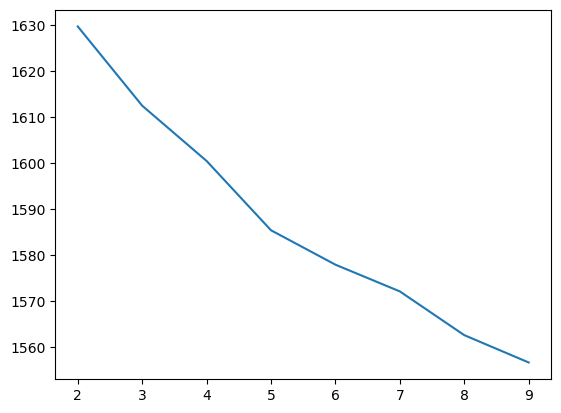

In [20]:
# vectorize the lyrics and check how many clusters we could try splitting the data into (the elbow test)

tf = TfidfVectorizer()

X4 = df4['lyrics']
X4 = tf.fit_transform(X4)

inertia = []
labels = {}
# Looking at 2-10 clusters.
for i in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=i, n_init='auto', random_state=50)
    kmeans.fit(X4)
    labels[f'{i}_clusters'] = kmeans.labels_
    inertia.append(kmeans.inertia_)

plt.plot(range(2,10), inertia)

In [56]:
# check how the songs would be split into 5 clusters
kmeans = cluster.KMeans(n_clusters=5, random_state=42)  
kmeans.fit(X4)
y_kmeans4 = kmeans.predict(X4)
df4['label'] = y_kmeans4
df4['label'].value_counts()

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    986
3    520
4    114
1     64
0     32
Name: label, dtype: int64

In [57]:
# now trying to analyze how the lyrics were clustered
# first, some basic cluster analysis by word frequency and unique words in each cluster
from collections import Counter

# a function to remove punctuation and non-alphanumerics (for word-counting purposes)
def remove_punct(word):
    for char in word:
        if not char.isalnum():
            word = word.replace(char, "")
    return word

cluster4__ = df4[df4['label']==4]
cluster3__ = df4[df4['label']==3]
cluster2__ = df4[df4['label']==2]
cluster1__ = df4[df4['label']==1]
cluster0__ = df4[df4['label']==0]
clusters__ = [cluster0__, cluster1__, cluster2__, cluster3__, cluster4__]

# checking 20 most common words in each cluster
d__ = {'cluster0': [], 'cluster1' : [], 'cluster2' : [], 'cluster3' : [], 'cluster4' : []}
n = 0
for cl in clusters__:
    lst = []
    for l in cl.lyrics:
        lst.extend(l.split())
        lst_clean = map(remove_punct, lst)
    c = Counter(lst_clean)
    d__[f'cluster{n}'] = [x[0] for x in list(c.most_common(20))]
    print(f"\nThe most common words in cluster {n} are: {c.most_common(20)}")
    print(f'The word {c.most_common(1)[0][0]} appears {(c.most_common(1)[0][1]/len(cl)):.2f} times per song on average.')
    print(f'The word {c.most_common(2)[1][0]} appears {(c.most_common(2)[1][1]/len(cl)):.2f} times per song on average.')
    n+=1


The most common words in cluster 0 are: [('la', 508), ('im', 177), ('like', 162), ('baby', 136), ('hey', 117), ('love', 108), ('feel', 101), ('make', 100), ('cause', 95), ('want', 91), ('know', 89), ('ooh', 87), ('got', 85), ('oh', 85), ('yeah', 84), ('me', 78), ('lala', 78), ('girl', 66), ('get', 64), ('see', 58)]
The word la appears 15.88 times per song on average.
The word im appears 5.53 times per song on average.

The most common words in cluster 1 are: [('ooh', 917), ('im', 328), ('like', 327), ('yeah', 322), ('love', 256), ('know', 253), ('gotta', 240), ('oh', 232), ('shake', 223), ('baby', 200), ('oohooh', 194), ('me', 185), ('watch', 170), ('you', 159), ('cause', 145), ('let', 138), ('get', 136), ('go', 133), ('make', 118), ('got', 114)]
The word ooh appears 14.33 times per song on average.
The word im appears 5.12 times per song on average.

The most common words in cluster 2 are: [('im', 5081), ('like', 3877), ('love', 3435), ('know', 3380), ('baby', 2836), ('yeah', 2281), 

C:\Users\User\AppData\Local\Temp\ipykernel_21452\4126579854.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['sentiment'] = cl['lyrics'].apply(lambda x: TextBlob(x).sentiment[0])
C:\Users\User\AppData\Local\Temp\ipykernel_21452\4126579854.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['sentimentVaderPos'] = cl['lyrics'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
C:\Users\User\AppData\Local\Temp\ipykernel_21452\4126579854.py:10: SettingWithCopyWarning: 
A value is trying to be set on a

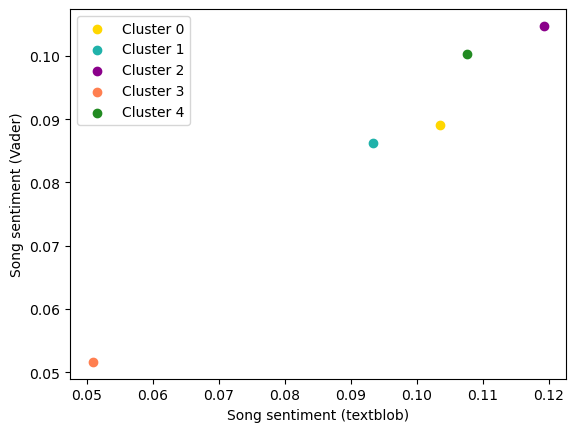

0.0963523641514302
0.08977050679239897
0.11199081051930884
0.05129848404167956
0.10400595015081315


In [59]:
# next doing sentiment analysis
# nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

for cl in clusters__:
    cl['sentiment'] = cl['lyrics'].apply(lambda x: TextBlob(x).sentiment[0])
    cl['sentimentVaderPos'] = cl['lyrics'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
    cl['sentimentVaderNeg'] = cl['lyrics'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
    cl['Vader'] = cl['sentimentVaderPos'] - cl['sentimentVaderNeg']

plt.scatter(cluster0__['sentiment'].mean(), cluster0__['Vader'].mean(), c = 'gold', label='Cluster 0')
plt.scatter(cluster1__['sentiment'].mean(), cluster1__['Vader'].mean(), c = 'lightseagreen', label='Cluster 1')
plt.scatter(cluster2__['sentiment'].mean(), cluster2__['Vader'].mean(), c = 'darkmagenta', label='Cluster 2')
plt.scatter(cluster3__['sentiment'].mean(), cluster3__['Vader'].mean(), c = 'coral', label='Cluster 3')
plt.scatter(cluster4__['sentiment'].mean(), cluster4__['Vader'].mean(), c = 'forestgreen', label='Cluster 4')

plt.xlabel('Song sentiment (textblob)')
plt.ylabel('Song sentiment (Vader)')
plt.legend()
plt.show()

for cl in clusters__:
    print((cl['sentiment'].mean() + cl['Vader'].mean())/2)

In [124]:
vec_df = pd.DataFrame(X.toarray())    # df with vectors generated by tfid
vec_df3 = pd.DataFrame(X3.toarray())
vec_df4 = pd.DataFrame(X4.toarray())

model = manifold.TSNE(n_components=2, perplexity=30)    # can try perplexity values between 5 and 50

out = model.fit_transform(vec_df)
out3 = model.fit_transform(vec_df3)
out4 = model.fit_transform(vec_df4)

df_tsne = pd.DataFrame(out)
df_tsne['label'] = y_kmeans
df_tsne3 = pd.DataFrame(out3)
df_tsne3['label'] = y_kmeans3
df_tsne4 = pd.DataFrame(out4)
df_tsne4['label'] = y_kmeans4

cluster3_tsne = df_tsne[df_tsne['label']==3]
cluster2_tsne = df_tsne[df_tsne['label']==2]
cluster1_tsne = df_tsne[df_tsne['label']==1]
cluster0_tsne = df_tsne[df_tsne['label']==0]

cluster7_tsne3 = df_tsne3[df_tsne3['label']==7]
cluster6_tsne3 = df_tsne3[df_tsne3['label']==6]
cluster5_tsne3 = df_tsne3[df_tsne3['label']==5]
cluster4_tsne3 = df_tsne3[df_tsne3['label']==4]
cluster3_tsne3 = df_tsne3[df_tsne3['label']==3]
cluster2_tsne3 = df_tsne3[df_tsne3['label']==2]
cluster1_tsne3 = df_tsne3[df_tsne3['label']==1]
cluster0_tsne3 = df_tsne3[df_tsne3['label']==0]

cluster4_tsne4 = df_tsne4[df_tsne4['label']==4]
cluster3_tsne4 = df_tsne4[df_tsne4['label']==3]
cluster2_tsne4 = df_tsne4[df_tsne4['label']==2]
cluster1_tsne4 = df_tsne4[df_tsne4['label']==1]
cluster0_tsne4 = df_tsne4[df_tsne4['label']==0]

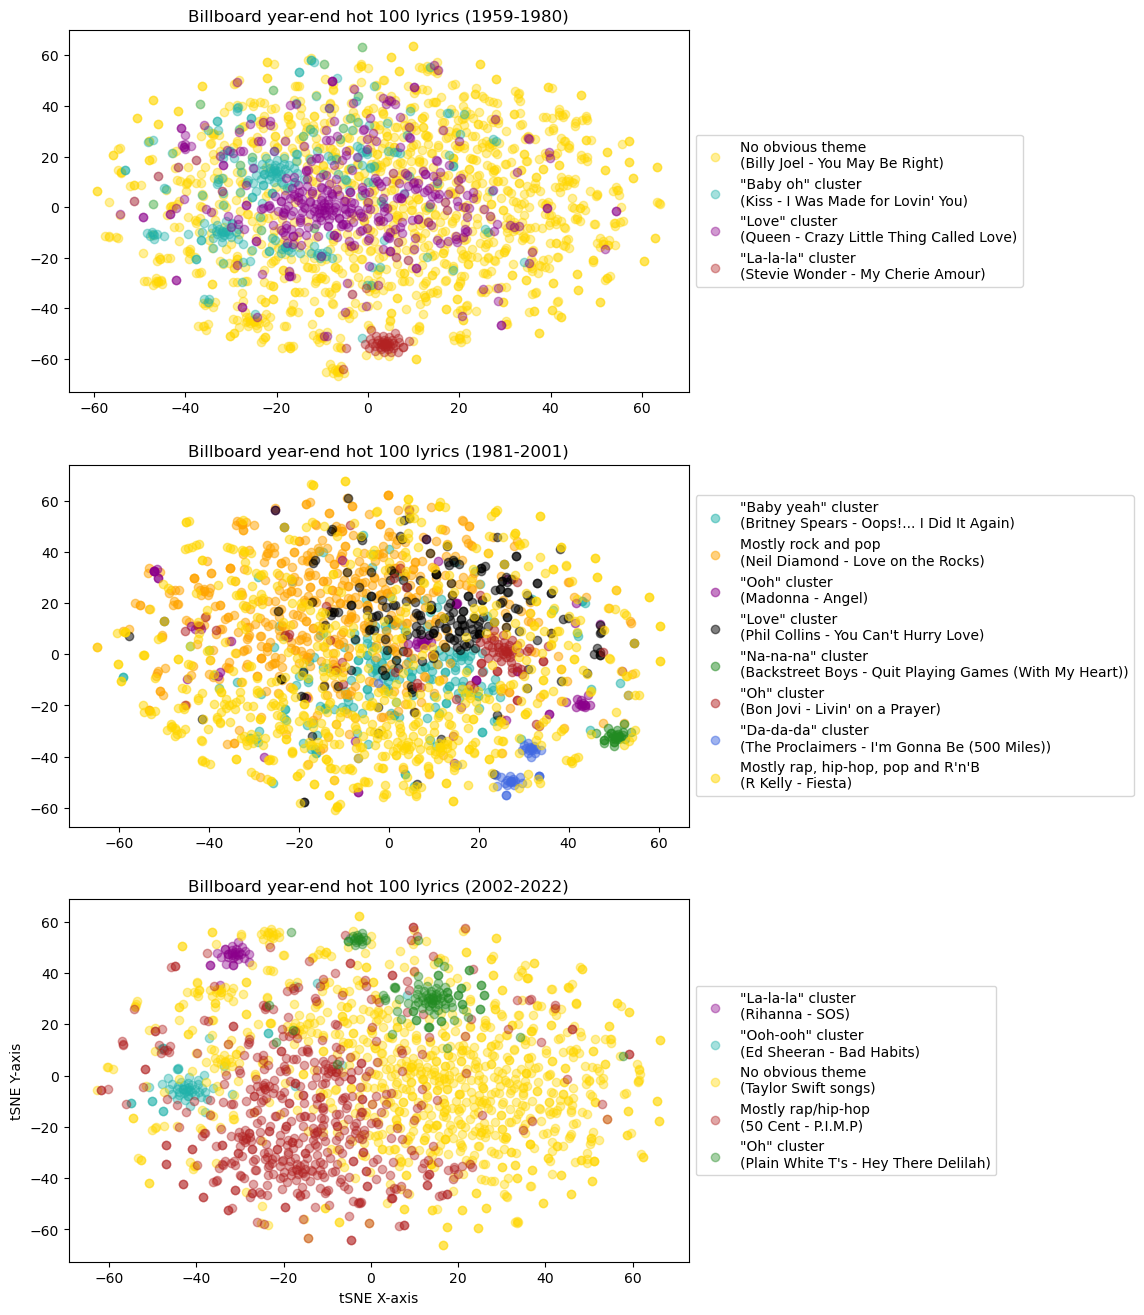

In [175]:
# final visualization: brief description of each cluster based on the most common words and a song example

fig, axs = plt.subplots(3, 1, figsize=(10,16))

axs[0].scatter(cluster0_tsne[0], cluster0_tsne[1], c = 'gold', alpha = 0.4, label = 'No obvious theme\n(Billy Joel - You May Be Right)')
axs[0].scatter(cluster1_tsne[0], cluster1_tsne[1], c = 'lightseagreen', alpha = 0.4, label = '"Baby oh" cluster\n(Kiss - I Was Made for Lovin\' You)')
axs[0].scatter(cluster2_tsne[0], cluster2_tsne[1], c = 'darkmagenta', alpha = 0.4, label = '"Love" cluster\n(Queen - Crazy Little Thing Called Love)')
axs[0].scatter(cluster3_tsne[0], cluster3_tsne[1], c = 'firebrick', alpha = 0.4, label = '"La-la-la" cluster\n(Stevie Wonder - My Cherie Amour)')
axs[0].set_title("Billboard year-end hot 100 lyrics (1959-1980)")
box0 = axs[0].get_position()
axs[0].set_position([box0.x0, box0.y0, box0.width * 0.8, box0.height])
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axs[1].scatter(cluster0_tsne3[0], cluster0_tsne3[1], c = 'lightseagreen', alpha = 0.5, label = '"Baby yeah" cluster\n(Britney Spears - Oops!... I Did It Again)')
axs[1].scatter(cluster1_tsne3[0], cluster1_tsne3[1], c = 'orange', alpha = 0.5, label = 'Mostly rock and pop\n(Neil Diamond - Love on the Rocks)')
axs[1].scatter(cluster2_tsne3[0], cluster2_tsne3[1], c = 'darkmagenta', alpha = 0.5, label = '"Ooh" cluster\n(Madonna - Angel)')
axs[1].scatter(cluster3_tsne3[0], cluster3_tsne3[1], c = 'black', alpha = 0.5, label = '"Love" cluster\n(Phil Collins - You Can\'t Hurry Love)')
axs[1].scatter(cluster4_tsne3[0], cluster4_tsne3[1], c = 'forestgreen', alpha = 0.5, label = '"Na-na-na" cluster\n(Backstreet Boys - Quit Playing Games (With My Heart))')
axs[1].scatter(cluster5_tsne3[0], cluster5_tsne3[1], c = 'firebrick', alpha = 0.5, label = '"Oh" cluster\n(Bon Jovi - Livin\' on a Prayer)')
axs[1].scatter(cluster6_tsne3[0], cluster6_tsne3[1], c = 'royalblue', alpha = 0.5, label = '"Da-da-da" cluster\n(The Proclaimers - I\'m Gonna Be (500 Miles))')
axs[1].scatter(cluster7_tsne3[0], cluster7_tsne3[1], c = 'gold', alpha = 0.5, label = 'Mostly rap, hip-hop, pop and R\'n\'B\n(R Kelly - Fiesta)')
axs[1].set_title("Billboard year-end hot 100 lyrics (1981-2001)")
axs[1].legend()
box1 = axs[1].get_position()
axs[1].set_position([box1.x0, box1.y0, box1.width * 0.8, box1.height])
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axs[2].scatter(cluster0_tsne4[0], cluster0_tsne4[1], c = 'darkmagenta', alpha = 0.4, label = '"La-la-la" cluster\n(Rihanna - SOS)')
axs[2].scatter(cluster1_tsne4[0], cluster1_tsne4[1], c = 'lightseagreen', alpha = 0.4, label = '"Ooh-ooh" cluster\n(Ed Sheeran - Bad Habits)')
axs[2].scatter(cluster2_tsne4[0], cluster2_tsne4[1], c = 'gold', alpha = 0.4, label = 'No obvious theme\n(Taylor Swift songs)')
axs[2].scatter(cluster3_tsne4[0], cluster3_tsne4[1], c = 'firebrick', alpha = 0.4, label = 'Mostly rap/hip-hop\n(50 Cent - P.I.M.P)')
axs[2].scatter(cluster4_tsne4[0], cluster4_tsne4[1], c = 'forestgreen', alpha = 0.4, label = '"Oh" cluster\n(Plain White T\'s - Hey There Delilah)')
axs[2].set_title("Billboard year-end hot 100 lyrics (2002-2022)")
axs[2].legend()
box2 = axs[2].get_position()
axs[2].set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('tSNE X-axis')
plt.ylabel('tSNE Y-axis')

plt.show()